# Aperiodic electrophysiological activity tracks spiking statistics between behavioral states
Sawyer Figueroa, Michael Preston, Bradley Voytek

# SfN 2023, Poster Panel 3
This notebook reproduces the figures from poster panel 3. Panel 3 compares spiking statistics between cognitive and behavioral states.

Dataset: Allen Institute for Brain Science: Visual Coding - Neuropixels  
© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels

## Set-up

### set paths

In [1]:
# settings - directories
PROJECT_PATH = 'G:/Shared drives/visual_encoding'

### imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import neo

In [4]:
# custom
import sys
sys.path.append("../../")
from allen_vc.plots import sync_plot
from allen_vc.stats import sync_stats

print("Packages Imported")

Packages Imported


### Settings

In [5]:
# matplotlib and figure appearance settings
plt.style.use(f'../../stylelib/sfn_2023.mplstyle')
# COLORS = ["#7570b3", "#3FAA96", "#F39943"]


### load results

In [6]:
# load spike stats
df_running = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/spontaneous_running.csv')
df_stationary = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/spontaneous_stationary.csv')

# join
metric_df = pd.concat([df_running, df_stationary], ignore_index=True)
metric_df

,session,brain_structure,epoch_idx,epoch_times,running,mean_firing_rate,unit_firing_rates,coefficient_of_variation,spike_distance,spike_synchrony,correlation_coefficient
0,766640955,VISp,0,"[array(4965.52) * s, array(4995.52) * s]",True,6.264744,"[13.533333333333333, 35.2, 0.06666666666666667...",1.110658,0.163423,0.370231,[[ 1.00000000e+00 6.67225908e-01 -7.22633902e...
1,766640955,LGd,0,"[array(4965.52) * s, array(4995.52) * s]",True,13.664035,"[1.1, 26.166666666666668, 19.333333333333332, ...",1.033110,0.212247,0.339766,[[ 1. -0.07431009 0.20476274 ... -0.1...
2,766640955,VISp,1,"[array(5213.48) * s, array(5243.48) * s]",True,6.607692,"[28.433333333333334, 33.46666666666667, 0.2, 3...",1.063694,0.163266,0.376675,[[ 1. 0.16878978 -0.2212767 ... ...
3,766640955,LGd,1,"[array(5213.48) * s, array(5243.48) * s]",True,14.746491,"[1.6, 24.933333333333334, 17.5, 6.766666666666...",1.026426,0.220148,0.340000,[[ 1. -0.10238838 0.32844878 ... -0.2...
4,767871931,VISp,0,"[array(4429.72) * s, array(4459.72) * s]",True,5.435974,"[1.7, 5.866666666666666, 3.3666666666666667, 1...",1.376762,0.125223,0.368852,[[ 1. 0.26442389 0.24551869 ... ...
...,...,...,...,...,...,...,...,...,...,...,...
1375,766640955,LGd,41,"[array(6086.98) * s, array(6116.98) * s]",False,12.606140,"[3.1333333333333333, 20.666666666666668, 18.76...",1.035868,0.217796,0.335689,[[ 1. 0.07516445 0.14505777 ... -0.1...
1376,766640955,VISp,42,"[array(6116.98) * s, array(6146.98) * s]",False,5.867308,"[5.866666666666666, 26.033333333333335, 1.1, 1...",1.193461,0.158384,0.361091,[[ 1. -0.1858007 0.37855016 ... -0.0...
1377,766640955,LGd,42,"[array(6116.98) * s, array(6146.98) * s]",False,11.178070,"[5.833333333333333, 18.766666666666666, 18.966...",1.044482,0.212102,0.333847,[[ 1.00000000e+00 3.82833973e-01 -1.64120915e...
1378,766640955,VISp,43,"[array(6146.98) * s, array(6176.98) * s]",False,6.183333,"[10.866666666666667, 35.63333333333333, 1.4, 1...",1.077319,0.165063,0.363876,[[ 1. -0.05546346 0.09090032 ... -0.2...


In [7]:
# remove whitespace from brain_sturcutre column
metric_df['brain_structure'] = metric_df['brain_structure'].str.strip()
print(len(metric_df.loc[metric_df['brain_structure']=='LGd']))

417


In [8]:
# remove NaNs from the data
metric_df = metric_df.dropna(subset=['mean_firing_rate', 'spike_distance'])

## Main

### Spike-distance graphic

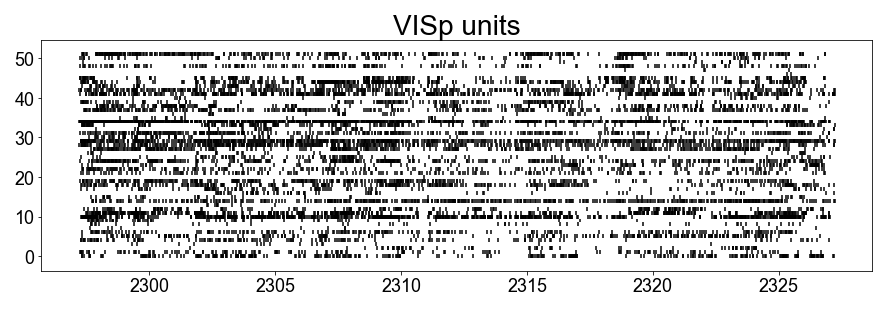

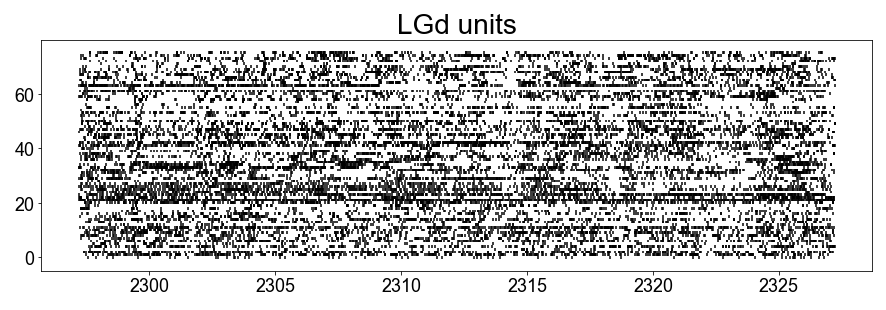

In [9]:
# load example data block
stim_code = 'natural_movie_one_more_repeats'
path_in = f"{PROJECT_PATH}/data/blocks/segmented/{stim_code}"
files = os.listdir(path_in)
fname_in = files[0] # first file
block = neo.io.NeoMatlabIO(f"{path_in}/{fname_in}").read_block()
segment = block.segments[0] # first segment

# get spike times for each region and plot
for region in ['VISp', 'LGd']:
    spike_trains = segment.filter(objects=neo.SpikeTrain, targdict={'brain_structure': region})
    spike_times = [st.times for st in spike_trains]

    # plot spikes
    fig_1, ax_1 = plt.subplots(figsize=(12, 4))
    ax_1.eventplot(spike_times, color='k')
    ax_1.set_title(f"{region} units")


### State comparison - violin plots
compare mean spike stats between states

In [10]:
def run_labels(s):
    if s == True:
        return 'running'
    else:
        return 'stationary'

metric_df['behavior'] = metric_df['running'].apply(run_labels)

In [11]:
# define metrics to be plotted 
metrics = ['mean_firing_rate', 'spike_distance']
condition = 'behavior'

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


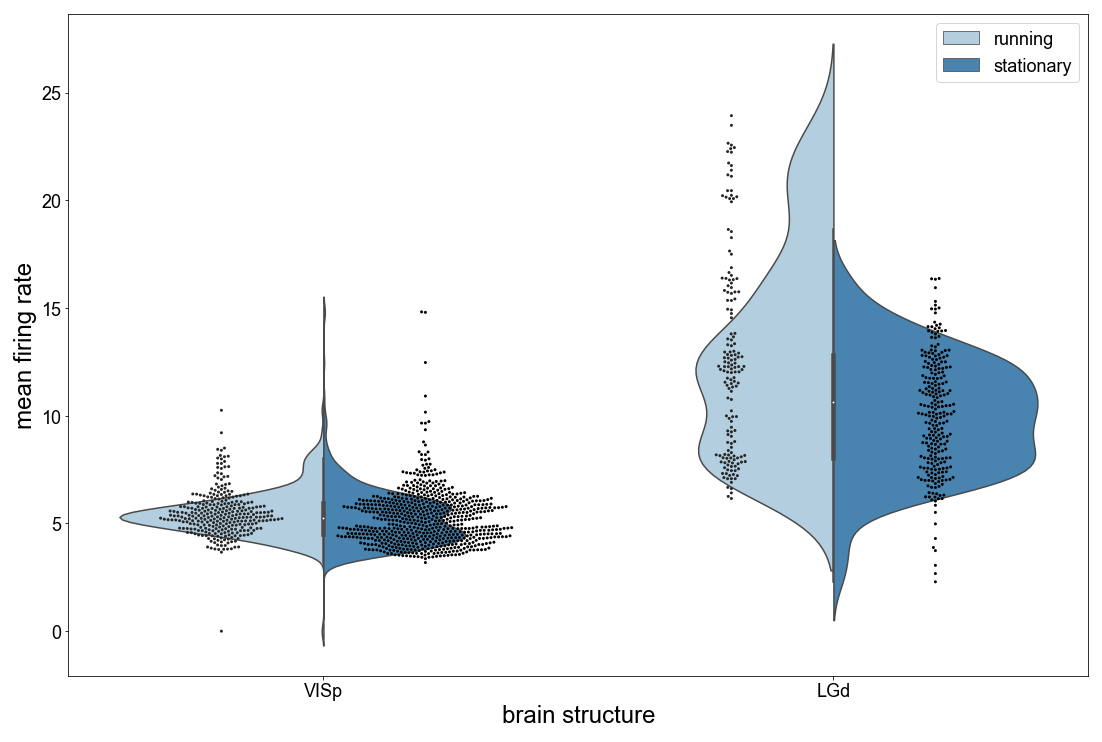

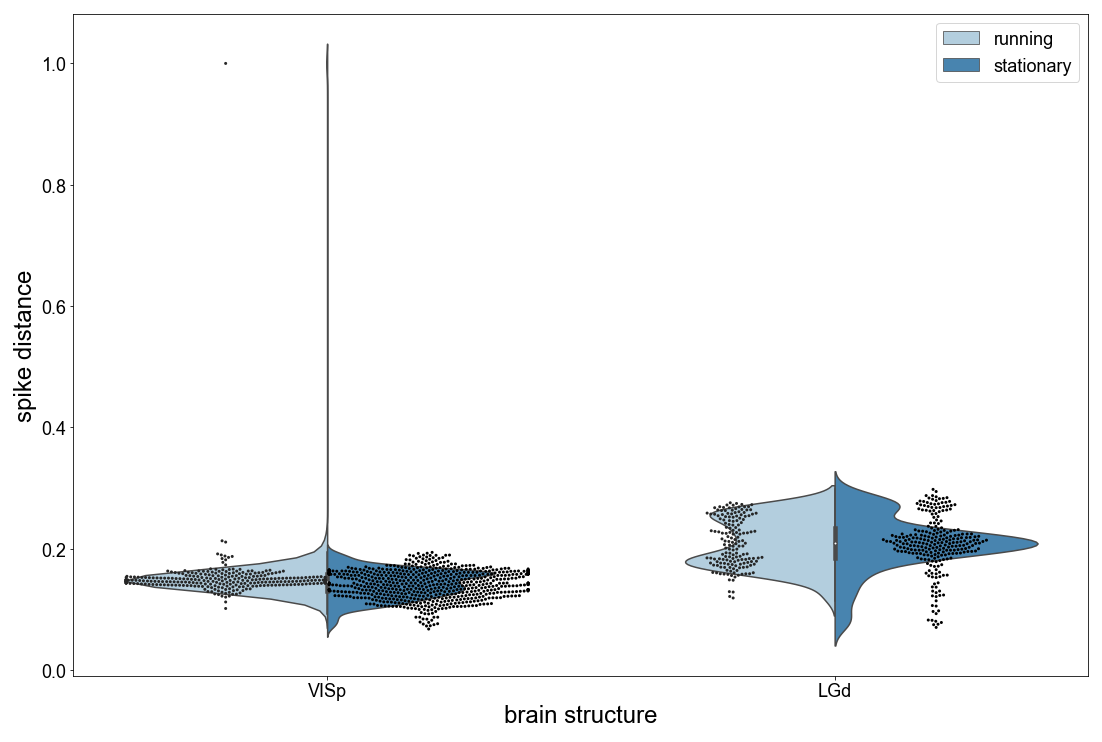

In [12]:
# plot all epocbhs
sync_plot(metric_df, metrics, condition, markersize=3);

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


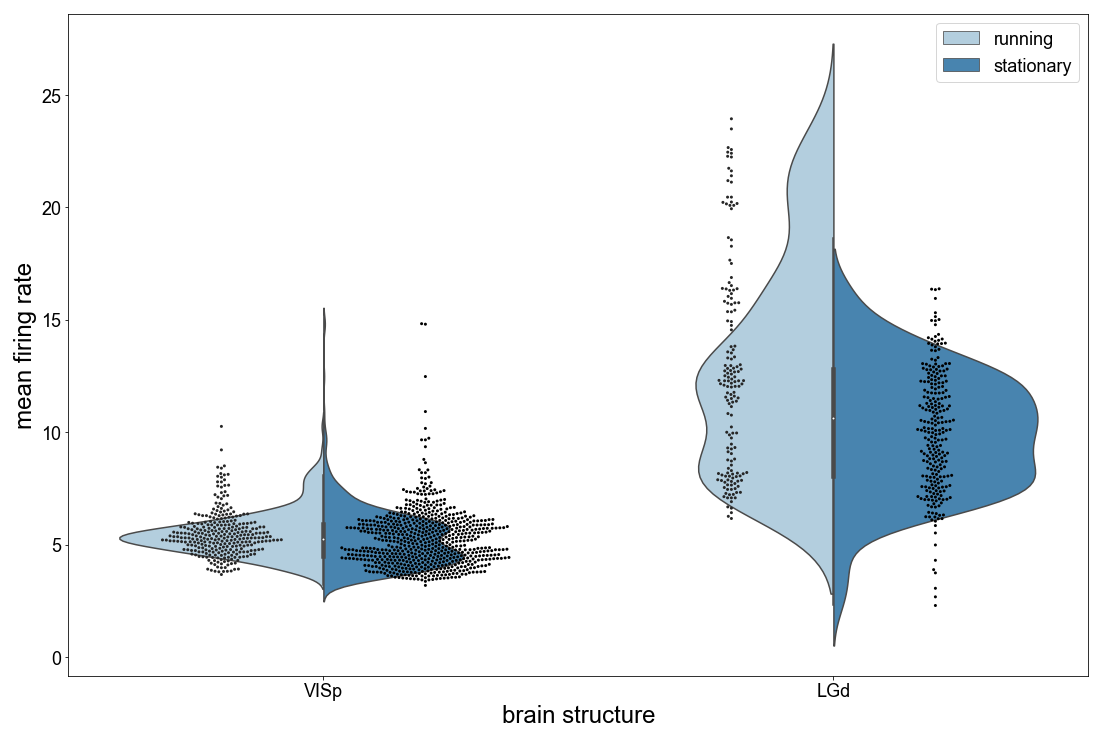

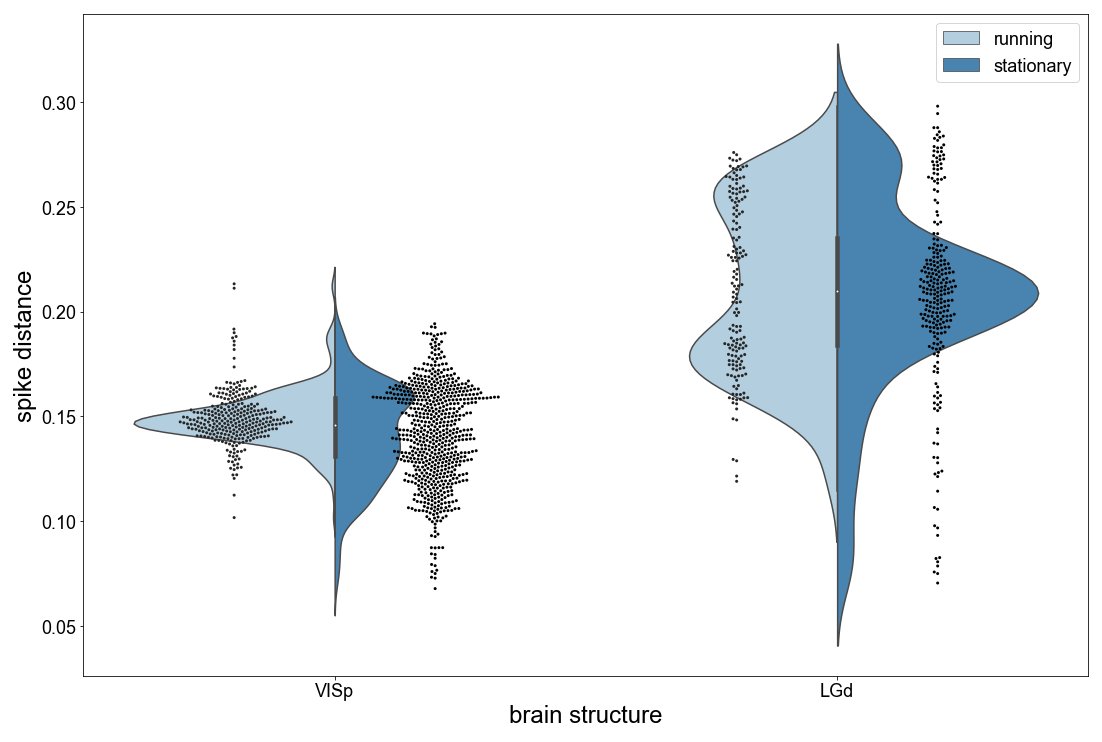

In [13]:
# plot all epochs - without outliers 

# identify clear outliers in SPIKE-distance
# metric_df[metric_df['spike_distance'] < 0.25]

# remove outliers
no_outliers_metric_df = metric_df[metric_df['spike_distance'] < 1]

# plot
sync_plot(no_outliers_metric_df, metrics, condition, markersize=3);

#plt.savefig("C:/Users/User/Documents/Voytek Lab/posters/figures/all_sessions_metric_violin_plots.png")

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


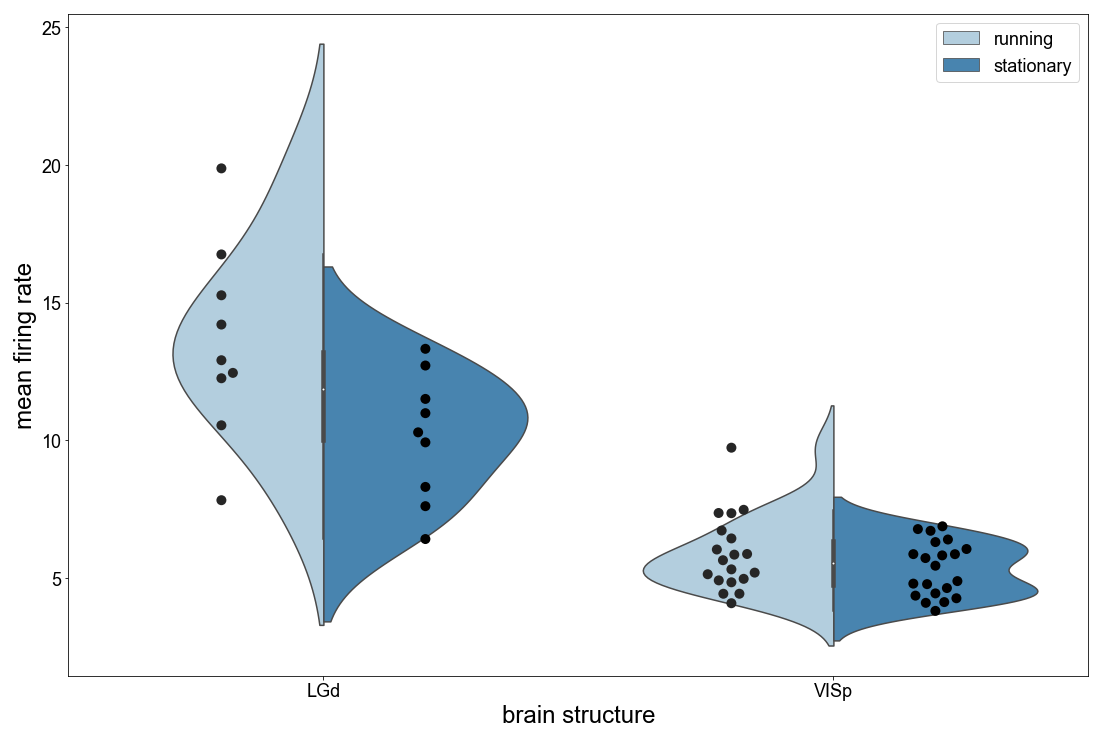

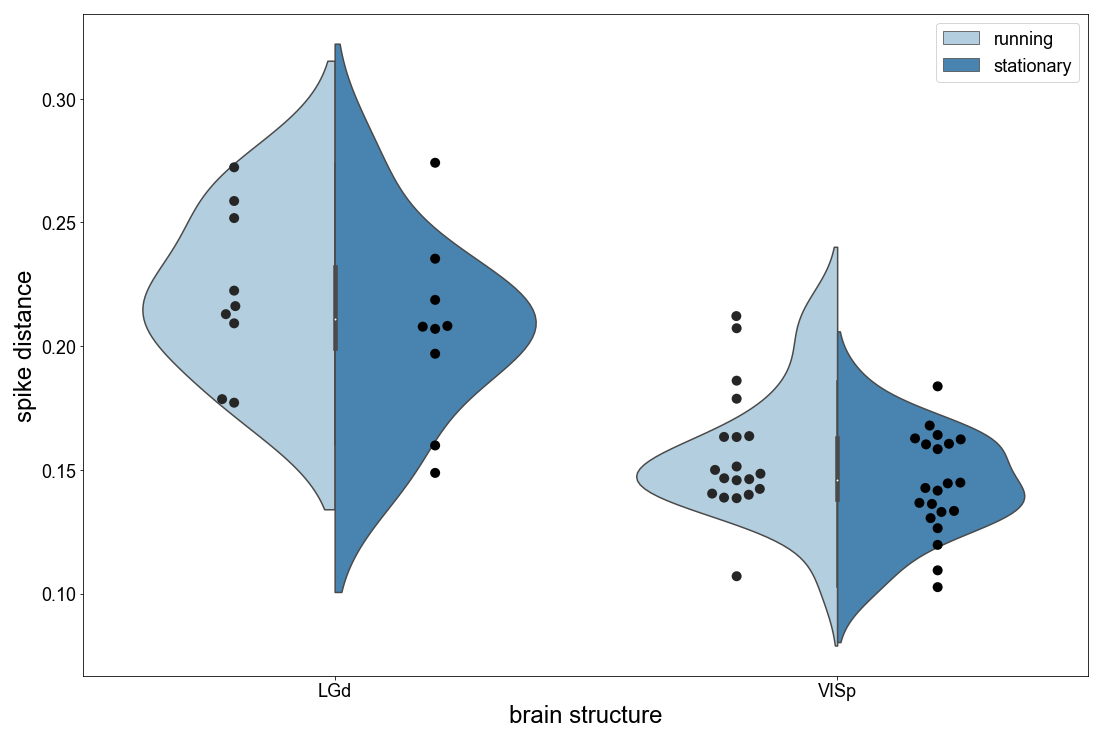

In [14]:
# plot subject average 

# average across trials
ses_avg = metric_df.groupby(['session', 'behavior', 'brain_structure']).mean().reset_index()

# plot
sync_plot(ses_avg, metrics, condition, markersize=10);

### State comparison - statistics

#### paired t-test

In [15]:
# post hoc tests

# look at diffs between running and stationary
print("ALL DATA\n\n\n")
sync_stats(metric_df, metrics, condition)

ALL DATA



REGION: VISp

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

METRIC: mean_firing_rate

Behavior: running
N = 299
Mean = 5.465580295498224
Stdev = 1.0403099076367723

Behavior: stationary
N = 664
Mean = 5.26230657490645
Stdev = 1.2942527706427738

Independent T-Test (All data)
Ttest_indResult(statistic=2.387782255703683, pvalue=0.017142729928100845)


----------------------------------------------------------------------------------------------------

METRIC: spike_distance

Behavior: running
N = 299
Mean = 0.15176473357254963
Stdev = 0.050712125580077795

Behavior: stationary
N = 664
Mean = 0.14136440288191174
Stdev = 0.02332860732494304

Independent T-Test (All data)
Ttest_indResult(statistic=4.354284135735598, pvalue=1.4782221542821623e-05)


----------------------------------------------------------------------------------------------------

REGION: LGd

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [16]:
print("GROUP AVERAGES\n\n\n")
sync_stats(ses_avg, metrics, condition, paired_ttest=True)

GROUP AVERAGES



REGION: LGd

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

METRIC: mean_firing_rate

Behavior: running
N = 9
Mean = 13.565424563038706
Stdev = 3.3131725941141275

Behavior: stationary
N = 9
Mean = 10.119672434648294
Stdev = 2.1876595072093843

Independent T-Test (All data)
Ttest_indResult(statistic=2.4547657022630522, pvalue=0.025924249373701313)

Paired T-Test
Ttest_relResult(statistic=3.949129112121454, pvalue=0.004241196973054426)


----------------------------------------------------------------------------------------------------

METRIC: spike_distance

Behavior: running
N = 9
Mean = 0.2221534179524424
Stdev = 0.03150251879059855

Behavior: stationary
N = 9
Mean = 0.2063264284351905
Stdev = 0.035200274597505556

Independent T-Test (All data)
Ttest_indResult(statistic=0.9476500163411974, pvalue=0.35740181725497144)

Paired T-Test
Ttest_relResult(statistic=1.3338701739542356, pvalue=0.21897012040046362)


---

#### hierarchical bootstrap